Based on https://trueq.quantumbenchmark.com/guides/introduction/circuits.html <br>
My exercises:
<br>a) compare Pauli X vs. exp(-jpi)*X
<br>b) determine the generators of a gate and to construct gates via generators
<br>c) NaitiveGate created via factory - I'm confused here
<br>d) cycles (aka constructing a circuit)
<br>e) circuit: cycles+meta+results


 list of aliased gates
{'id': Gate.id, 'x': Gate.x, 'y': Gate.y, 'z': Gate.z, 'cx': Gate.cx, 'cy': Gate.cy, 'cz': Gate.cz, 'swap': Gate.swap, 'iswap': Gate.iswap, 'h': Gate.h, 's': Gate.s, 'sx': Gate.sx, 'sy': Gate.sy, 't': Gate.t, 'ch': Gate.ch, 'i': Gate.id, 'sz': Gate.s, 'cnot': Gate.cx, 'cliff0': Gate.id, 'cliff1': Gate.x, 'cliff2': Gate.y, 'cliff3': Gate.z, 'cliff4': Gate.cliff4, 'cliff5': Gate.sx, 'cliff6': Gate.cliff6, 'cliff7': Gate.sy, 'cliff8': Gate.cliff8, 'cliff9': Gate.s, 'cliff10': Gate.cliff10, 'cliff11': Gate.cliff11, 'cliff12': Gate.h, 'cliff13': Gate.cliff13, 'cliff14': Gate.cliff14, 'cliff15': Gate.cliff15, 'cliff16': Gate.cliff16, 'cliff17': Gate.cliff17, 'cliff18': Gate.cliff18, 'cliff19': Gate.cliff19, 'cliff20': Gate.cliff20, 'cliff21': Gate.cliff21, 'cliff22': Gate.cliff22, 'cliff23': Gate.cliff23}

 compare Pauli X vs. exp(-jpi)*X
Equality holds up to a phase: True
scaled_gate is unitary: False
Equality holds for arbitary constants: False


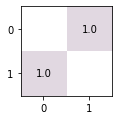

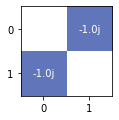

In [1]:
#-a-
import trueq as tq

print(' list of aliased gates')
print(tq.Gate.ALIASES)

print('\n compare Pauli X vs. exp(-jpi)*X')
# construct a Pauli X gate and visualize it using visualization.plot_mat()
gate = tq.Gate.x
tq.visualization.plot_mat(gate.mat)

# construct a gate from a matrix
phased_gate = tq.Gate([[0, -1j], [-1j, 0]])
tq.visualization.plot_mat(phased_gate.mat)

# check that equality holds up to an overall phase
print("Equality holds up to a phase:", phased_gate == gate)

# check that equality holds up to an overall phase
scaled_gate = tq.Gate([[0, 2], [2, 0]])
print("scaled_gate is unitary:", scaled_gate.is_unitary)
print("Equality holds for arbitary constants:", phased_gate == scaled_gate)

generator Hadamar: {'X': (127.27922061357853+0j), 'Z': (127.27922061357856+0j)}
generator 2q example {'XX': (90.00000000000014+0j), 'YZ': (180.00000000000034+0j)}


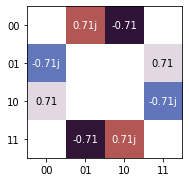

In [2]:
#-b-
# generators can be obtained for generic gates
print('generator Hadamar:',tq.Gate.h.generators)

# gates can be constructed from generators
gate = tq.Gate.from_generators("XX", 90, "YZ", 180)
tq.visualization.plot_mat(gate.mat)
print('generator 2q example',gate.generators)

In [3]:
#-c-
# make a factory that produces z rotations
rz = tq.config.GateFactory.from_matrix("Rz", [[1, 0], [0, "exp(1j*pi*theta/180)"]])

# construct a native gate
rz(90)
#print('generator rz',rz.generators)  # will fail
#tq.Gate(rz) # will fail

Rz(theta)

In [4]:
#-d-  A Cycle is a round of operations on a quantum device
# compiler tools are free to merge and expand Gates within a contiguous block of Cycles with equal markers
tq.Cycle({0: tq.Gate.x, (1, 2): tq.Gate.cz}, marker=3)
#tq.Results({"10": 5, "00": 2, "01": "10", "11": 3})

3 Marker 3 Compilation tools may only recompile cycles with equal markers.,(0): Gate.x Name: Gate.x Aliases: Gate.x Gate.cliff1 Generators: 'X': 180.0 Matrix: 1.00 1.00


In [5]:
#-e-  CIRCUIT
key = tq.Key(foo="bar", fruits=("apples", "oranges"))

circuit = tq.Circuit(cycles=[
    tq.Cycle({0: tq.Gate.x, 1: tq.Gate.y, (2, 3): tq.Gate.cnot}),
    tq.Cycle({(1, 3): tq.Gate.cz, 4: tq.Gate.x}, marker=1),
    tq.Cycle({0: tq.Gate.y, (2, 4): tq.Gate.cx}, marker=1),
    tq.Cycle({2: tq.Gate.h, 3: tq.Gate.s, 4: tq.Gate.z}),
    tq.Cycle({(0, 4): tq.Gate.cnot, 2: tq.Gate.y}, marker=2),
], key=key).measure_all()

circuit.results = {"01000": 3, "01001": 2, "01010": 1, "01011": 4}

circuit

Circuit(Cycle((0,): Gate.x, (1,): Gate.y, (2, 3): Gate.cx),Cycle((1, 3): Gate.cz, (4,): Gate.x, marker=1),Cycle((0,): Gate.y, (2, 4): Gate.cx, marker=1),Cycle((2,): Gate.h, (3,): Gate.s, (4,): Gate.z),Cycle((0, 4): Gate.cx, (2,): Gate.y, marker=2),Cycle((0,): Meas(), (1,): Meas(), (2,): Meas(), (3,): Meas(), (4,): Meas(), marker=3))

In [6]:
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)